# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"D:\heart-diease.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,0,125,212,False,1,168,No,1.0,2,2,3,0
1,53,Male,0,140,203,True,0,155,Yes,3.1,0,0,3,0
2,70,Male,0,145,174,False,1,125,Yes,2.6,0,0,3,0
3,61,Male,0,148,203,False,1,161,No,0.0,2,1,3,0
4,62,Female,0,138,294,True,1,106,No,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,1,140,221,False,1,164,Yes,0.0,2,0,2,1
1021,60,Male,0,125,258,False,0,141,Yes,2.8,1,1,3,0
1022,47,Male,0,110,275,False,0,118,Yes,1.0,1,1,2,0
1023,50,Female,0,110,254,False,0,159,No,0.0,2,0,2,1


In [4]:
df=df.rename(columns={"chol":"cholestrol"})
df=df.rename(columns={"fbs":"Fasting-Blood-Sugar"})
df=df.rename(columns={"Thalach":"max-heart-rate"})
df=df.rename(columns={"exang":"ex-induced-angina"})
df=df.rename(columns={"sex":"Gender"})
df=df.rename(columns={"cp":"chest-pain-type"})

In [5]:
df.head()

,age,Gender,chest-pain-type,trestbps,cholestrol,Fasting-Blood-Sugar,restecg,thalach,ex-induced-angina,oldpeak,slope,ca,thal,target
0,52,Male,0,125,212,False,1,168,No,1.0,2,2,3,0
1,53,Male,0,140,203,True,0,155,Yes,3.1,0,0,3,0
2,70,Male,0,145,174,False,1,125,Yes,2.6,0,0,3,0
3,61,Male,0,148,203,False,1,161,No,0.0,2,1,3,0
4,62,Female,0,138,294,True,1,106,No,1.9,1,3,2,0


In [7]:
import sklearn.preprocessing

Label_Encoder =sklearn.preprocessing.LabelEncoder()
df['Gender']=Label_Encoder.fit_transform(df['Gender'])
df['Fasting-Blood-Sugar']=Label_Encoder.fit_transform(df['Fasting-Blood-Sugar'])
df['ex-induced-angina']=Label_Encoder.fit_transform(df['ex-induced-angina'])

In [8]:
df.head()

,age,Gender,chest-pain-type,trestbps,cholestrol,Fasting-Blood-Sugar,restecg,thalach,ex-induced-angina,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [11]:

# Calculate correlation matrix
correlation_matrix = df.corr()

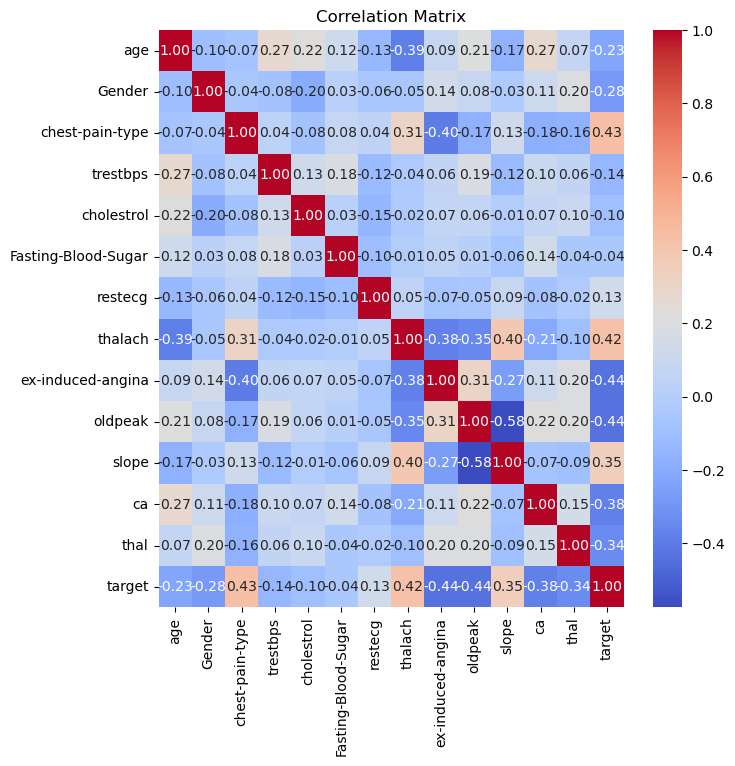

In [10]:

# Plotting the heatmap
plt.figure(figsize=(7.5, 7.5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


# Genetic as feature selection

In [263]:
from sklearn.model_selection import train_test_split
import random

In [264]:
x_input=df[['age','Gender','chest pain type','trestbps','cholestrol','Fasting-Blood-Sugar','restecg','thalach','ex-induced-angina','oldpeak','slope','ca','thal']]
y_output=df[['target']]

In [265]:
X_train_heart, X_test_heart, Y_train_heart, Y_test_heart = train_test_split(x_input,y_output, test_size=0.3,random_state=42)

In [266]:
def encode_chromosome(num_features):
    return [random.randint(0, 1) for _ in range(num_features)]

def select_parents(population, fitness_scores):
    return random.choices(population, weights=fitness_scores, k=2)

def crossover(parents, crossover_rate):
    child1, child2 = parents
    if random.random() < crossover_rate:
        crossover_point = random.randint(1, len(child1) - 1)
        child1[crossover_point:], child2[crossover_point:] = child2[crossover_point:], child1[crossover_point:]
    return child1, child2
def mutate(chromosome, mutation_rate):
    mutated_chromosome = chromosome.copy()
    for i in range(len(mutated_chromosome)):
        if random.random() < mutation_rate:
            mutated_chromosome[i] = 1 - mutated_chromosome[i]
    return mutated_chromosome
POPULATION_SIZE = 10
def generate_initial_population(num_features, population_size):
    return [encode_chromosome(num_features) for _ in range(population_size)]
def evaluate_population(population, X_train_heart, Y_train_heart, num_features):
    fitness_scores = []
    for chromosome in population:
        fitness_scores.append(sum(chromosome))
    return fitness_scores
def generate_offsprings(population, fitness_scores, crossover_rate, mutation_rate):
    offsprings = []
    while len(offsprings) < len(population):
        parents = select_parents(population, fitness_scores)
        child1, child2 = crossover(parents, crossover_rate)
        
        # Apply mutation to the offspring
        child1 = mutate(child1, mutation_rate)
        child2 = mutate(child2, mutation_rate)
        
        offsprings.append(child1)
        offsprings.append(child2)
    return offsprings
def evaluate_population(population, X_train_heart, Y_train_heart, num_features):
    fitness_scores = []
    for chromosome in population:
        # Counting the number of ones in the chromosome (selected features)
        num_ones = sum(chromosome)
        fitness_scores.append(num_ones)
    return fitness_scores
def select_survivors(population, offsprings, fitness_scores):
    population_with_offsprings = population + offsprings
    sorted_indices = np.argsort(fitness_scores)[::-1]
    return [population_with_offsprings[i] for i in sorted_indices[:len(population)]]
def genetic_algorithm(X_train_heart, Y_train_heart, num_features, num_generations, crossover_rate,mutation_rate):
    #seed for reproducibility
    random.seed(42)  
    population = generate_initial_population(num_features, POPULATION_SIZE)
    for _ in range(num_generations):
        fitness_scores = evaluate_population(population, X_train_heart, Y_train_heart, num_features)
        offsprings = generate_offsprings(population, fitness_scores, crossover_rate,mutation_rate)
        population = select_survivors(population, offsprings, fitness_scores)
    best_chromosome = population[0]
    selected_features = [i for i, bit in enumerate(best_chromosome) if bit == 1]
    return selected_features

In [267]:
num_generations =98
crossover_rate = 0.8
mutation_rate = 0.05
selected_features = genetic_algorithm(x_input, y_output, len(x_input.columns), num_generations, crossover_rate, mutation_rate)
print("Selected Features:", selected_features)

Selected Features: [0, 2, 5, 6, 8, 9, 10, 11, 12]


In [268]:
df.head(1)

,age,Gender,chest pain type,trestbps,cholestrol,Fasting-Blood-Sugar,restecg,thalach,ex-induced-angina,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0


# Decision tree as a classifier

In [269]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [270]:
# Selecting only the important features obtained from genetic algorithm
x_input_selected = x_input.iloc[:, selected_features]
# Splitting the selected data into training and testing sets
X_train_selected, X_test_selected, Y_train, Y_test = train_test_split(x_input_selected, y_output, test_size=0.3, random_state=42)

In [271]:
# Create Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

In [272]:
# Train the model
decision_tree.fit(X_train_selected, Y_train)

DecisionTreeClassifier(random_state=42)

In [273]:
# Predict on the test set
Y_pred_dt = decision_tree.predict(X_test_selected)

In [274]:
# Accuracy on the test set
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
print(f"Accuracy of Decision Tree Classifier with selected features: {accuracy_dt * 100:.2f}%")

Accuracy of Decision Tree Classifier with selected features: 96.75%


In [275]:
# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_dt)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[159   0]
 [ 10 139]]


# naive bayes

In [276]:
from sklearn.naive_bayes import GaussianNB

In [277]:
# Selecting only the important features obtained from genetic algorithm
x_input_selected = x_input.iloc[:, selected_features]
# Splitting the selected data into training and testing sets
X_train_selected, X_test_selected, Y_train, Y_test = train_test_split(x_input_selected, y_output, test_size=0.3, random_state=42)

In [278]:
# Create Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
# Train the model
nb_classifier.fit(X_train_selected, Y_train.values.ravel())
# Predict on the test set
Y_pred_nb = nb_classifier.predict(X_test_selected)

In [279]:
# Accuracy on the test set
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
print(f"Accuracy of Naive Bayes Classifier with selected features: {accuracy_nb * 100:.2f}%")

Accuracy of Naive Bayes Classifier with selected features: 79.55%


In [280]:
# Creating a confusion matrix
conf_matrix_nb = confusion_matrix(Y_test, Y_pred_nb)
print("Confusion Matrix:")
print(conf_matrix_nb)

Confusion Matrix:
[[118  41]
 [ 22 127]]


# Knn as classifier

In [281]:
from sklearn.neighbors import KNeighborsClassifier

In [282]:
# Selecting only the important features obtained from genetic algorithm
x_input_selected = x_input.iloc[:, selected_features]
# Splitting the selected data into training and testing sets
X_train_selected, X_test_selected, Y_train, Y_test = train_test_split(x_input_selected, y_output, test_size=0.3, random_state=42)

In [283]:
# Create KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=7)  # You can adjust the number of neighbors


In [284]:
# Train the model
knn_classifier.fit(X_train_selected, Y_train.values.ravel())
# Predict on the test set
Y_pred_knn = knn_classifier.predict(X_test_selected)

In [285]:
# Accuracy on the test set
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
print(f"Accuracy of KNN Classifier with selected features: {accuracy_knn * 100:.2f}%")

Accuracy of KNN Classifier with selected features: 85.39%


In [286]:
# Confusion matrix
conf_matrix_knn = confusion_matrix(Y_test, Y_pred_knn)
print("\nConfusion Matrix for KNN Classifier:")
print(conf_matrix_knn)


Confusion Matrix for KNN Classifier:
[[135  24]
 [ 21 128]]


# Comparision Between Classifiers

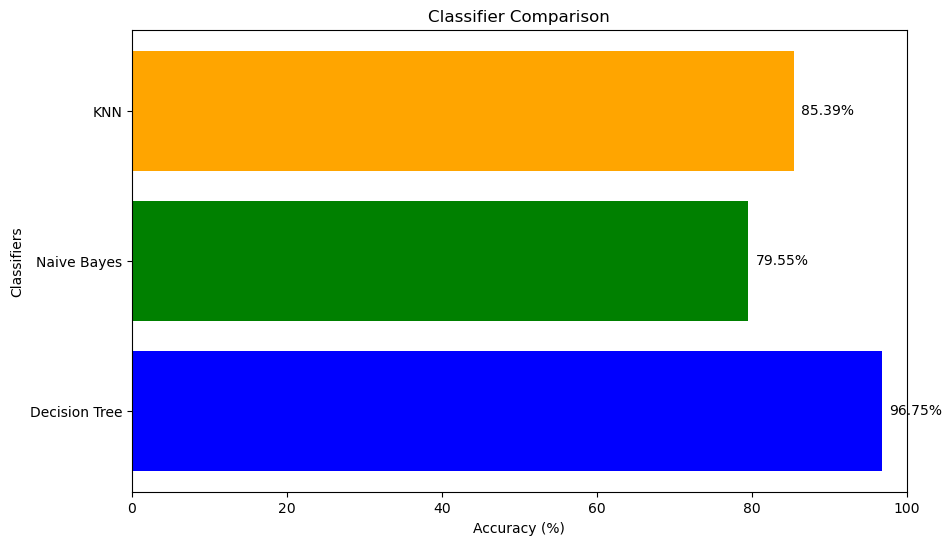

In [287]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy values for each classifier
accuracy_values = [accuracy_dt, accuracy_nb, accuracy_knn]
classifiers = ['Decision Tree', 'Naive Bayes', 'KNN']

# Convert accuracy values to percentages
accuracy_values_percent = [value * 100 for value in accuracy_values]

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(classifiers, accuracy_values_percent, color=['blue', 'green', 'orange'])
plt.xlim([0, 100])  # Set the x-axis limit between 0 and 100 for percentage values

# Adding labels and title
plt.xlabel('Accuracy (%)')
plt.ylabel('Classifiers')
plt.title('Classifier Comparison')

# Displaying the accuracy values on the right side of the bars
for i, value in enumerate(accuracy_values_percent):
    plt.text(value + 1, i, f'{value:.2f}%', ha='left', va='center')

# Show the plot
plt.show()


# Age Anaylsis

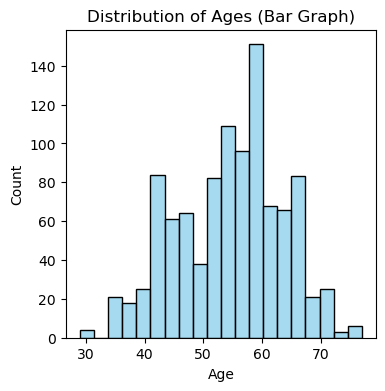

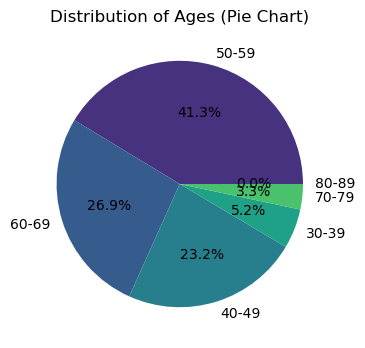

In [288]:

age_column = df['age']

# Bar Graph
plt.figure(figsize=(4, 4))
sns.histplot(age_column, bins=20, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Ages (Bar Graph)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Pie Chart
plt.figure(figsize=(4, 4))
age_ranges = pd.cut(age_column, bins=[29, 39, 49, 59, 69, 79, 89], labels=['30-39', '40-49', '50-59', '60-69', '70-79', '80-89'])
age_range_counts = age_ranges.value_counts()
plt.pie(age_range_counts, labels=age_range_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Distribution of Ages (Pie Chart)')
plt.show()


# Chest Pain Type Analysis

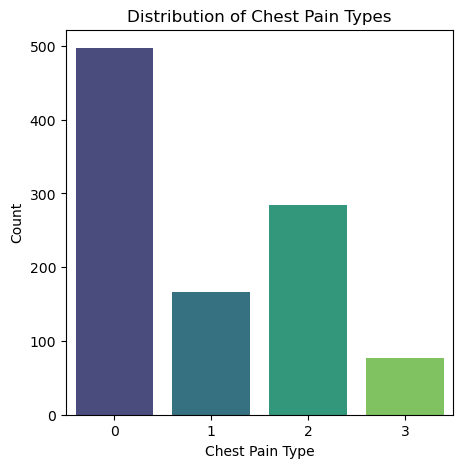

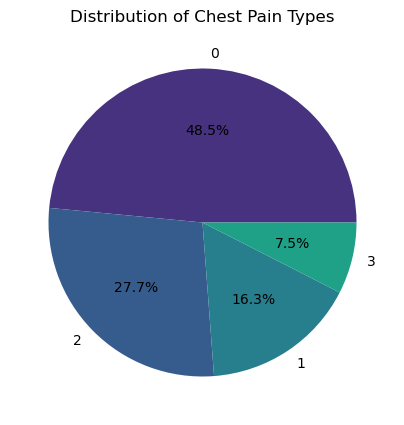

In [289]:

chest_pain_column = df['chest pain type']

# Count the occurrences of each chest pain type
chest_pain_counts = chest_pain_column.value_counts()

# Bar Graph
plt.figure(figsize=(5, 5))
sns.barplot(x=chest_pain_counts.index, y=chest_pain_counts.values, palette='viridis')
plt.title('Distribution of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

# Pie Chart
plt.figure(figsize=(5, 5))
plt.pie(chest_pain_counts, labels=chest_pain_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Distribution of Chest Pain Types')
plt.show()

## Fasting Blood Sugar (Fbs) Analysis

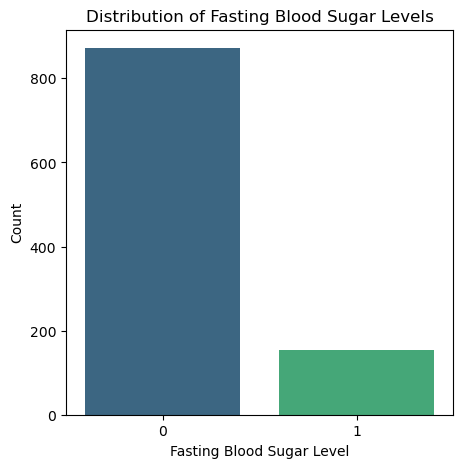

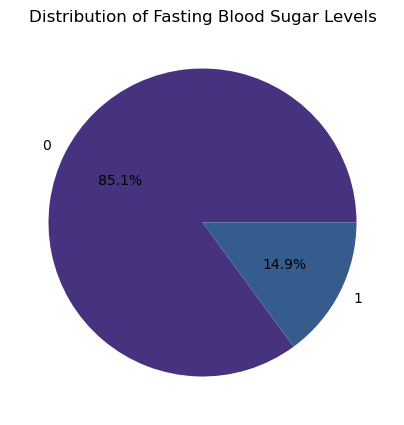

In [290]:

blood_sugar_column = df['Fasting-Blood-Sugar']

# Count the occurrences of each fasting blood sugar level
blood_sugar_counts = blood_sugar_column.value_counts()

# Bar Graph
plt.figure(figsize=(5, 5))
sns.barplot(x=blood_sugar_counts.index, y=blood_sugar_counts.values, palette='viridis')
plt.title('Distribution of Fasting Blood Sugar Levels')
plt.xlabel('Fasting Blood Sugar Level')
plt.ylabel('Count')
plt.show()

# Pie Chart
plt.figure(figsize=(5, 5))
plt.pie(blood_sugar_counts, labels=blood_sugar_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Distribution of Fasting Blood Sugar Levels')
plt.show()


# Restecg Analysis

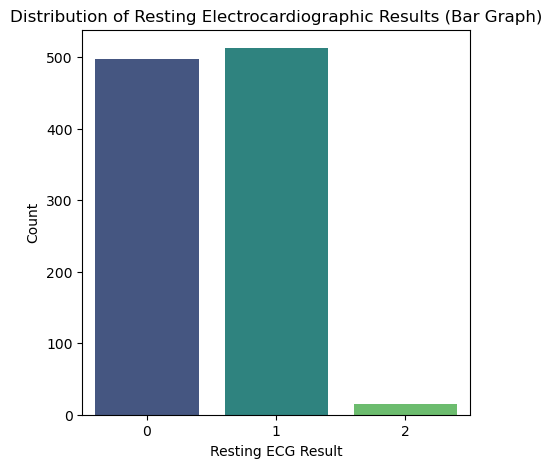

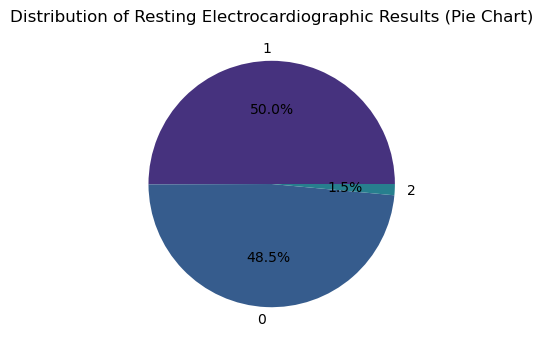

In [291]:

restecg_column = df['restecg']

# Bar Graph
plt.figure(figsize=(5, 5))
sns.countplot(x=restecg_column, palette='viridis')
plt.title('Distribution of Resting Electrocardiographic Results (Bar Graph)')
plt.xlabel('Resting ECG Result')
plt.ylabel('Count')
plt.show()

# Pie Chart
plt.figure(figsize=(4, 4))
restecg_counts = restecg_column.value_counts()
plt.pie(restecg_counts, labels=restecg_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Distribution of Resting Electrocardiographic Results (Pie Chart)')
plt.show()


# Exang (exercise - induced - angina) Analysis

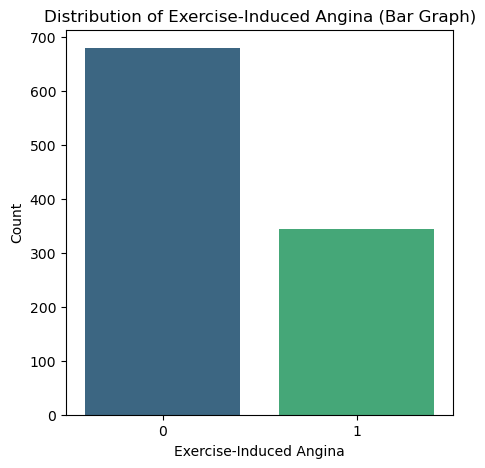

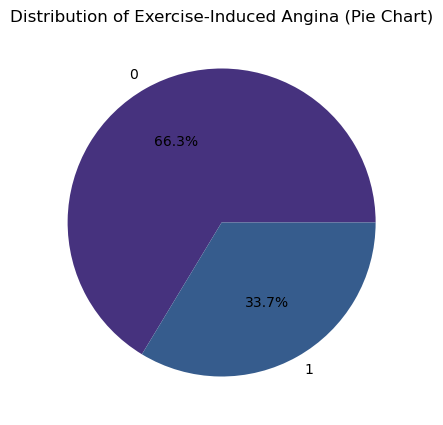

In [292]:

exang_column = df['ex-induced-angina']

# Bar Graph
plt.figure(figsize=(5, 5))
sns.countplot(x=exang_column, palette='viridis')
plt.title('Distribution of Exercise-Induced Angina (Bar Graph)')
plt.xlabel('Exercise-Induced Angina')
plt.ylabel('Count')
plt.show()

# Pie Chart
plt.figure(figsize=(5, 5))
exang_counts = exang_column.value_counts()
plt.pie(exang_counts, labels=exang_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Distribution of Exercise-Induced Angina (Pie Chart)')
plt.show()


# The slope of the peak exercise ST segment (slope) Analysis

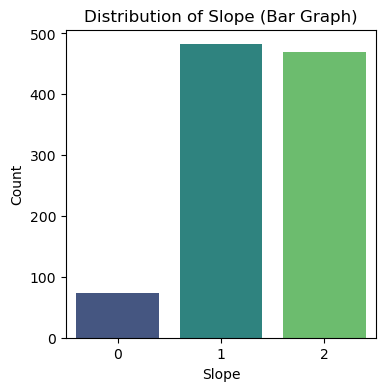

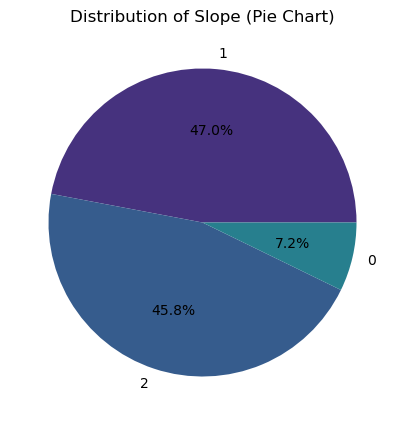

In [293]:

slope_column = df['slope']

# Bar Graph
plt.figure(figsize=(4, 4))
sns.countplot(x=slope_column, palette='viridis')
plt.title('Distribution of Slope (Bar Graph)')
plt.xlabel('Slope')
plt.ylabel('Count')
plt.show()

# Pie Chart
plt.figure(figsize=(5, 5))
slope_counts = slope_column.value_counts()
plt.pie(slope_counts, labels=slope_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Distribution of Slope (Pie Chart)')
plt.show()


# number of major vessels colored by flourosopy (category)

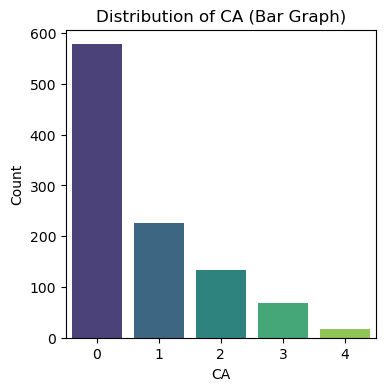

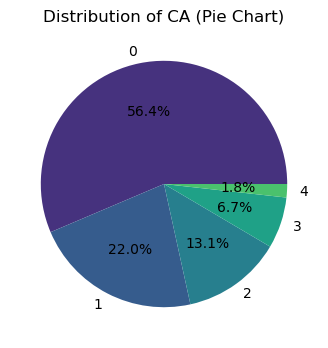

In [294]:

ca_column = df['ca']

# Bar Graph
plt.figure(figsize=(4, 4))
sns.countplot(x=ca_column, palette='viridis')
plt.title('Distribution of CA (Bar Graph)')
plt.xlabel('CA')
plt.ylabel('Count')
plt.show()

# Pie Chart
plt.figure(figsize=(4, 4))
ca_counts = ca_column.value_counts()
plt.pie(ca_counts, labels=ca_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Distribution of CA (Pie Chart)')
plt.show()


# Thal Analysis

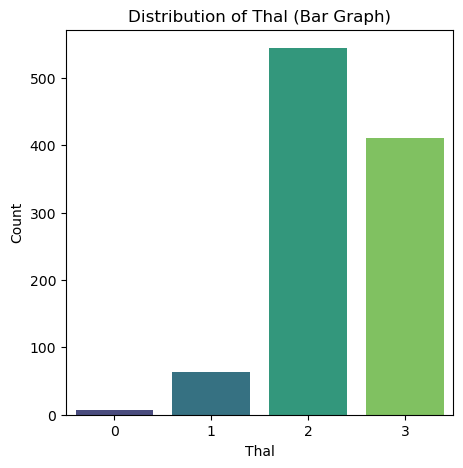

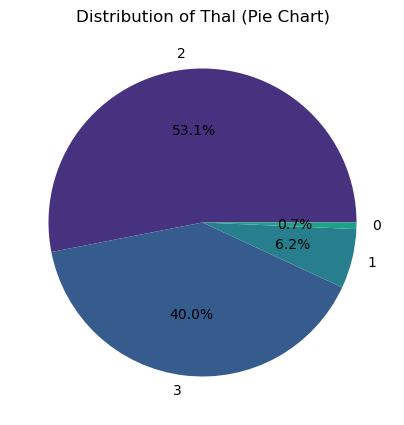

In [295]:

thal_column = df['thal']

# Bar Graph
plt.figure(figsize=(5, 5))
sns.countplot(x=thal_column, palette='viridis')
plt.title('Distribution of Thal (Bar Graph)')
plt.xlabel('Thal')
plt.ylabel('Count')
plt.show()

# Pie Chart
plt.figure(figsize=(5, 5))
thal_counts = thal_column.value_counts()
plt.pie(thal_counts, labels=thal_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Distribution of Thal (Pie Chart)')
plt.show()


# Predicate logics